In [1]:
!pip install pandas

In [2]:
!pip install matplotlib

Mounted at /content/drive


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

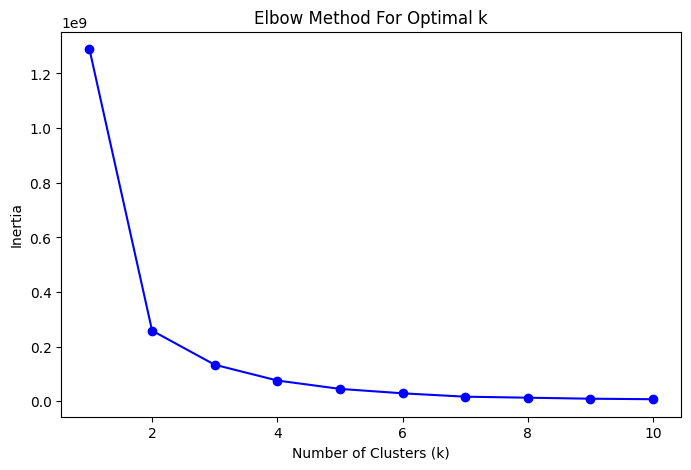

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


   CustomerID  Annual_Spend  Frequency_of_Purchase  Average_Purchase_Value  \
0           1         15000                     50                     300   
1           2         22000                     60                     367   
2           3         17000                     55                     309   
3           4         18000                     45                     400   
4           5         25000                     80                     312   

   Cluster  
0        2  
1        0  
2        2  
3        2  
4        1  


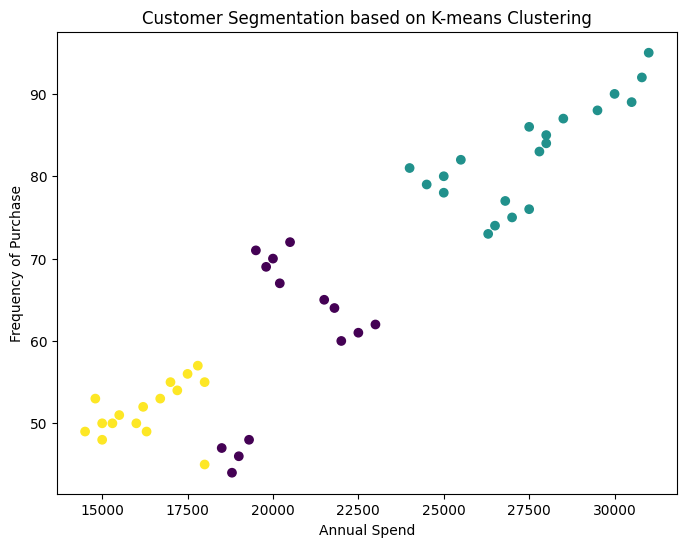

In [3]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Mount Google Drive (if using Colab)
from google.colab import drive
drive.mount('/content/drive')

# Load the dataset
file_path = '/content/drive/MyDrive/content/Mall_Customer.csv'  # Adjust the path if necessary
data = pd.read_csv(file_path)

# Select features for clustering
X = data[['Annual_Spend', 'Frequency_of_Purchase', 'Average_Purchase_Value']]

# Determine the optimal number of clusters using the elbow method
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

# Apply K-means clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(X)

# Display the first few rows of the dataset with the cluster assignments
print(data.head())

# Visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(data['Annual_Spend'], data['Frequency_of_Purchase'], c=data['Cluster'], cmap='viridis')
plt.xlabel('Annual Spend')
plt.ylabel('Frequency of Purchase')
plt.title('Customer Segmentation based on K-means Clustering')
plt.show()